In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.recurrent import GRU
%matplotlib inline

In [3]:
df = pd.read_csv('Dataset.csv')

In [4]:
df1 = df.reset_index()['hourly_traffic_count']
df1 = df1.iloc[:9792,]

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [7]:
window = 288
X,y = create_dataset(df1,window)

In [8]:
X.shape, y.shape

((9503, 288), (9503,))

In [9]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
X_train, X_test = X[0:training_size,:], X[training_size:,:]

In [10]:
X_train.shape , X_test.shape

((7833, 288), (1670, 288))

In [11]:
y_train, y_test = y[0:training_size,], y[training_size:,]

In [12]:
y_train.shape , y_test.shape

((7833,), (1670,))

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Model

In [14]:
model = Sequential()
model.add(GRU(50, input_shape=(288, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 50)                7950      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 8,001
Trainable params: 8,001
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
245/245 [==============================] - 24s 98ms/step - loss: 0.0120
Epoch 2/50
245/245 [==============================] - 24s 98ms/step - loss: 0.0054
Epoch 3/50
245/245 [==============================] - 27s 109ms/step - loss: 0.0053
Epoch 4/50
245/245 [==============================] - 24s 97ms/step - loss: 0.0053
Epoch 5/50
245/245 [==============================] - 27s 112ms/step - loss: 0.0053
Epoch 6/50
245/245 [==============================] - 26s 104ms/step - loss: 0.0052
Epoch 7/50
245/245 [==============================] - 27s 108ms/step - loss: 0.0053
Epoch 8/50
245/245 [==============================] - 26s 105ms/step - loss: 0.0053
Epoch 9/50
245/245 [==============================] - 26s 108ms/step - loss: 0.0052
Epoch 10/50
245/245 [==============================] - 28s 115ms/step - loss: 0.0052
Epoch 11/50
245/245 [==============================] - 24s 98ms/step - loss: 0.0052
Epoch 12/50
245/245 [==============================] - 24s 99ms/step - loss: 0

In [15]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [16]:
X_test.shape

(1670, 288, 1)

In [17]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [18]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

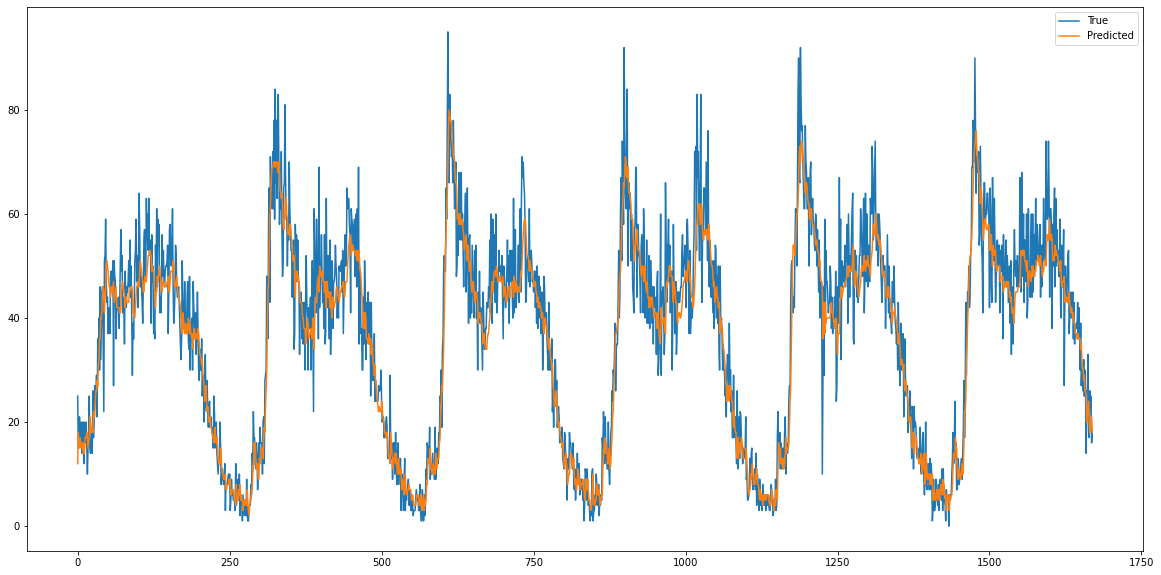

In [19]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='True')
plt.plot(test_predict, label = 'Predicted')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 7.937382606383061
MAE-train: 5.754755521511553
R_2-train: 0.8884492972863522


In [21]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.120225051950196
MAE-test: 5.352694610778443
R_2-train: 0.8738868112676403
